## Finding out error

In [2]:
weight = 0.5
input = 0.5
output = 0.8

In [3]:
prediction = input * weight
error = (prediction - output)**2
print(error)

0.30250000000000005


## Adjusting the weights up and down to check whether error reduces

In [4]:
weight = 0.5
lr = 0.01

def neural_network(input,weight):
    pred = input * weight
    return pred

In [5]:
input = 0.5
output = 0.8
pred = neural_network(input,weight)


In [6]:
def loss(x,y):
    return (x-y)**2

In [7]:
error=loss(pred,output)

In [8]:
predup = neural_network(input,weight+lr)
errorup = loss(predup,output)

In [9]:
preddn = neural_network(input,weight-lr)
errordn=loss(preddn,output)

In [10]:
if error > errordn or error > errorup :
    if errordn < errorup:
        weight -= lr
    else:
        weight += lr

In [11]:
print(weight)

0.51


## Hot and Cold learning
### Simplest form of learning in neural network

In [12]:
input = 0.5
weight = 0.5
output = 0.8

In [13]:
def neural_network(input,weight):
    pred = input* weight
    return pred

In [14]:
def loss(x,y):
    return (x-y)**2

In [15]:
lr = 0.001
iterations = 2000
j = 0
for i in range(iterations):
    pred = neural_network(input,weight)
    error = loss(pred,output)
    
    print('Iteration: {} prediction is {} error in prediction is {}'.format(i,pred,error))
    
    predup = neural_network(input,weight+lr)
    errorup = loss(predup,output)
    
    preddn = neural_network(input,weight-lr)
    errordn =loss(preddn,output)
    
    if error> errordn or error> errorup:
        if errordn < errorup:
            weight -=lr
        else:
            weight +=lr
            
    else:
        if j == 0:
            j=i
            print('optimized at step {} No more iterations required'.format(j))
            break
    

Iteration: 0 prediction is 0.25 error in prediction is 0.30250000000000005
Iteration: 1 prediction is 0.2505 error in prediction is 0.3019502500000001
Iteration: 2 prediction is 0.251 error in prediction is 0.30140100000000003
Iteration: 3 prediction is 0.2515 error in prediction is 0.30085225
Iteration: 4 prediction is 0.252 error in prediction is 0.30030400000000007
Iteration: 5 prediction is 0.2525 error in prediction is 0.2997562500000001
Iteration: 6 prediction is 0.253 error in prediction is 0.29920900000000006
Iteration: 7 prediction is 0.2535 error in prediction is 0.29866224999999996
Iteration: 8 prediction is 0.254 error in prediction is 0.29811600000000005
Iteration: 9 prediction is 0.2545 error in prediction is 0.2975702500000001
Iteration: 10 prediction is 0.255 error in prediction is 0.29702500000000004
Iteration: 11 prediction is 0.2555 error in prediction is 0.29648025
Iteration: 12 prediction is 0.256 error in prediction is 0.29593600000000003
Iteration: 13 prediction 

Iteration: 903 prediction is 0.701499999999978 error in prediction is 0.009702250000004338
Iteration: 904 prediction is 0.701999999999978 error in prediction is 0.009604000000004326
Iteration: 905 prediction is 0.7024999999999779 error in prediction is 0.009506250000004315
Iteration: 906 prediction is 0.7029999999999779 error in prediction is 0.009409000000004303
Iteration: 907 prediction is 0.7034999999999778 error in prediction is 0.009312250000004291
Iteration: 908 prediction is 0.7039999999999778 error in prediction is 0.00921600000000428
Iteration: 909 prediction is 0.7044999999999777 error in prediction is 0.009120250000004267
Iteration: 910 prediction is 0.7049999999999776 error in prediction is 0.009025000000004255
Iteration: 911 prediction is 0.7054999999999776 error in prediction is 0.008930250000004244
Iteration: 912 prediction is 0.7059999999999775 error in prediction is 0.008836000000004231
Iteration: 913 prediction is 0.7064999999999775 error in prediction is 0.0087422500

## Using both direction and amount for efficient learning

In [16]:
# Scaling , negative reversal and stopping
input = 0.5
weight = 0.5
output = 0.8
iterations = 40

for i in range(iterations):
    pred = neural_network(input,weight)
    # This is simplification of overall error, same can be derived from doing 
    # d/dweight (weight*input - output)** 2 = 2(weight*input - output)*input 
    # 2 can be negelected as model should be able to update alabeit little slower
    step_amount = (pred - output) * input
    weight -= step_amount
    print('Iteration {} prediction is {} error is {}'.format(i,pred,loss(pred,output)))

Iteration 0 prediction is 0.25 error is 0.30250000000000005
Iteration 1 prediction is 0.3875 error is 0.17015625000000004
Iteration 2 prediction is 0.49062500000000003 error is 0.095712890625
Iteration 3 prediction is 0.56796875 error is 0.05383850097656251
Iteration 4 prediction is 0.6259765625 error is 0.03028415679931642
Iteration 5 prediction is 0.669482421875 error is 0.0170348381996155
Iteration 6 prediction is 0.70211181640625 error is 0.00958209648728372
Iteration 7 prediction is 0.7265838623046875 error is 0.005389929274097089
Iteration 8 prediction is 0.7449378967285156 error is 0.0030318352166796153
Iteration 9 prediction is 0.7587034225463867 error is 0.0017054073093822882
Iteration 10 prediction is 0.76902756690979 error is 0.0009592916115275371
Iteration 11 prediction is 0.7767706751823426 error is 0.0005396015314842384
Iteration 12 prediction is 0.7825780063867569 error is 0.000303525861459885
Iteration 13 prediction is 0.7869335047900676 error is 0.00017073329707118678


## Scaling, negative reversal and stopping

In [17]:
# Scaling , negative reversal and stopping


def neural_network(input,weight):
    pred = input * weight
    return pred


In [18]:
input = 0.5
weight = 0.5
output = 0.8
iterations = 40
alpha = 0.01

pred = neural_network(input,weight)
error = (pred - output) ** 2
delta = (pred-output)
delta_weight = input * delta

weight -= delta_weight

print('weight {} delta_weight {} delta {} error {}'.format(weight,delta_weight,delta,error))

weight 0.775 delta_weight -0.275 delta -0.55 error 0.30250000000000005


In [19]:
input = 0.5
weight = 0.5
output = 0.8
iterations = 100
alpha = 1

for i in range(iterations):
    pred = neural_network(input,weight)
    error = (pred-output) ** 2
    delta = (pred - output)
    delta_weight = delta * input
    weight -= delta_weight * alpha
    print('Acutal output {} prediction {} error {} delta {} weight {} delta_weight{}'.format(output,pred,error,delta,weight,delta_weight))

Acutal output 0.8 prediction 0.25 error 0.30250000000000005 delta -0.55 weight 0.775 delta_weight-0.275
Acutal output 0.8 prediction 0.3875 error 0.17015625000000004 delta -0.41250000000000003 weight 0.9812500000000001 delta_weight-0.20625000000000002
Acutal output 0.8 prediction 0.49062500000000003 error 0.095712890625 delta -0.309375 weight 1.1359375 delta_weight-0.1546875
Acutal output 0.8 prediction 0.56796875 error 0.05383850097656251 delta -0.23203125000000002 weight 1.251953125 delta_weight-0.11601562500000001
Acutal output 0.8 prediction 0.6259765625 error 0.03028415679931642 delta -0.17402343750000004 weight 1.33896484375 delta_weight-0.08701171875000002
Acutal output 0.8 prediction 0.669482421875 error 0.0170348381996155 delta -0.1305175781250001 weight 1.4042236328125 delta_weight-0.06525878906250004
Acutal output 0.8 prediction 0.70211181640625 error 0.00958209648728372 delta -0.09788818359375007 weight 1.453167724609375 delta_weight-0.04894409179687503
Acutal output 0.8 pr

In [20]:
weight, goal_pred, input = (0.0, 0.8, 1.1)
for iteration in range(7):
    print( "-----\nWeight:" + str(weight))
    pred = input * weight
    error = (pred - goal_pred) ** 2
    delta = pred - goal_pred
    weight_delta = delta * input
    weight = weight - weight_delta
    print( "Error:" + str(error) + " Prediction:" + str(pred))
    print( "Delta:" + str(delta) + " Weight Delta:" + str(weight_delta))

-----
Weight:0.0
Error:0.6400000000000001 Prediction:0.0
Delta:-0.8 Weight Delta:-0.8800000000000001
-----
Weight:0.8800000000000001
Error:0.02822400000000005 Prediction:0.9680000000000002
Delta:0.16800000000000015 Weight Delta:0.1848000000000002
-----
Weight:0.6951999999999999
Error:0.0012446784000000064 Prediction:0.76472
Delta:-0.03528000000000009 Weight Delta:-0.0388080000000001
-----
Weight:0.734008
Error:5.4890317439999896e-05 Prediction:0.8074088
Delta:0.007408799999999993 Weight Delta:0.008149679999999992
-----
Weight:0.72585832
Error:2.4206629991042546e-06 Prediction:0.798444152
Delta:-0.0015558480000000818 Weight Delta:-0.0017114328000000902
-----
Weight:0.7275697528
Error:1.0675123826048965e-07 Prediction:0.80032672808
Delta:0.00032672808000000497 Weight Delta:0.0003594008880000055
-----
Weight:0.727210351912
Error:4.707729607278605e-09 Prediction:0.7999313871032001
Delta:-6.861289679993554e-05 Weight Delta:-7.54741864799291e-05


## What is a function

A function defines relationship between an input and an output

In [21]:
def square(x):
    return x**2

In [22]:
input = 0.5
weight = 0.5
output = 0.8
iterations = 100
alpha = 0.01

for i in range(iterations):
    pred = input * weight
    error = (pred-output) ** 2
    delta = (pred-output)
    weight_delta = delta * input
    weight -= weight_delta
    print('Iteration {} prediction is {} and error is {} acutal output was {} '.format(i,pred,error,output))

Iteration 0 prediction is 0.25 and error is 0.30250000000000005 acutal output was 0.8 
Iteration 1 prediction is 0.3875 and error is 0.17015625000000004 acutal output was 0.8 
Iteration 2 prediction is 0.49062500000000003 and error is 0.095712890625 acutal output was 0.8 
Iteration 3 prediction is 0.56796875 and error is 0.05383850097656251 acutal output was 0.8 
Iteration 4 prediction is 0.6259765625 and error is 0.03028415679931642 acutal output was 0.8 
Iteration 5 prediction is 0.669482421875 and error is 0.0170348381996155 acutal output was 0.8 
Iteration 6 prediction is 0.70211181640625 and error is 0.00958209648728372 acutal output was 0.8 
Iteration 7 prediction is 0.7265838623046875 and error is 0.005389929274097089 acutal output was 0.8 
Iteration 8 prediction is 0.7449378967285156 and error is 0.0030318352166796153 acutal output was 0.8 
Iteration 9 prediction is 0.7587034225463867 and error is 0.0017054073093822882 acutal output was 0.8 
Iteration 10 prediction is 0.7690275

## Concept: "Learning is adjusting our weight to reduce the error to zero"

### How we changed weight in hot and cold learning
if up_error > dn_error:

    weight += step_amount

else:

    weight -= step_amount

In [24]:
red_length = blue_length * 2

NameError: name 'blue_length' is not defined

In [25]:
error = ((input * weight) - goal_pred) ** 2

In [26]:
error = ((0.5 * weight) - 0.8) ** 2

In [31]:
import numpy as np  
import matplotlib.pyplot as plt  
def graph(formula, x_range):  
    weight = np.array(x_range)  
    y = eval(formula)
    plt.plot(weight, y)  
    plt.show()

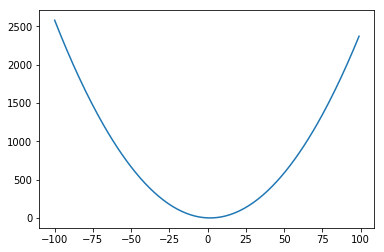

In [33]:
graph('((0.5 * weight) - 0.8) ** 2',range(-100,100))

y = (((beta * gamma) ** 2) + (epsilon + 22 - x)) ** (1/2)

# Playing with gradient descent to understand the importance of alpha 

In [35]:
input = 0.5
weight = 0.5
output = 0.8
iterations = 20
for i in range(iterations):
    pred =(input*weight)
    error = ((input*weight) - output) **2
    delta = pred - output
    weight_delta = input*delta
    weight -= weight_delta
    print('Iteration {} prediction {} actual {} error {}'.format(i,pred,output,error))

Iteration 0 prediction 0.25 actual 0.8 error 0.30250000000000005
Iteration 1 prediction 0.3875 actual 0.8 error 0.17015625000000004
Iteration 2 prediction 0.49062500000000003 actual 0.8 error 0.095712890625
Iteration 3 prediction 0.56796875 actual 0.8 error 0.05383850097656251
Iteration 4 prediction 0.6259765625 actual 0.8 error 0.03028415679931642
Iteration 5 prediction 0.669482421875 actual 0.8 error 0.0170348381996155
Iteration 6 prediction 0.70211181640625 actual 0.8 error 0.00958209648728372
Iteration 7 prediction 0.7265838623046875 actual 0.8 error 0.005389929274097089
Iteration 8 prediction 0.7449378967285156 actual 0.8 error 0.0030318352166796153
Iteration 9 prediction 0.7587034225463867 actual 0.8 error 0.0017054073093822882
Iteration 10 prediction 0.76902756690979 actual 0.8 error 0.0009592916115275371
Iteration 11 prediction 0.7767706751823426 actual 0.8 error 0.0005396015314842384
Iteration 12 prediction 0.7825780063867569 actual 0.8 error 0.000303525861459885
Iteration 13 

## trying to break the model by changing the input 

In [37]:
input = 2
weight = 0.5
output = 0.8
iterations = 20
for i in range(iterations):
    pred =(input*weight)
    error = ((input*weight) - output) **2
    delta = pred - output
    weight_delta = input*delta
    weight -= weight_delta
    print('Iteration {} prediction {} actual {} error {}'.format(i,pred,output,error))

Iteration 0 prediction 1.0 actual 0.8 error 0.03999999999999998
Iteration 1 prediction 0.20000000000000018 actual 0.8 error 0.3599999999999998
Iteration 2 prediction 2.5999999999999996 actual 0.8 error 3.2399999999999984
Iteration 3 prediction -4.599999999999999 actual 0.8 error 29.159999999999986
Iteration 4 prediction 16.999999999999996 actual 0.8 error 262.4399999999999
Iteration 5 prediction -47.79999999999998 actual 0.8 error 2361.959999999998
Iteration 6 prediction 146.59999999999994 actual 0.8 error 21257.639999999978
Iteration 7 prediction -436.5999999999998 actual 0.8 error 191318.75999999983
Iteration 8 prediction 1312.9999999999995 actual 0.8 error 1721868.839999999
Iteration 9 prediction -3935.799999999999 actual 0.8 error 15496819.559999991
Iteration 10 prediction 11810.599999999997 actual 0.8 error 139471376.03999993
Iteration 11 prediction -35428.59999999999 actual 0.8 error 1255242384.3599997
Iteration 12 prediction 106288.99999999999 actual 0.8 error 11297181459.239996

In [40]:
input = 0.5
weight = 40
output = 0.8
iterations = 20
for i in range(iterations):
    pred =(input*weight)
    error = ((input*weight) - output) **2
    delta = pred - output
    weight_delta = input*delta
    weight -= weight_delta
    print('Iteration {} prediction {} actual {} error {}'.format(i,pred,output,error))

Iteration 0 prediction 20.0 actual 0.8 error 368.64
Iteration 1 prediction 15.2 actual 0.8 error 207.35999999999996
Iteration 2 prediction 11.6 actual 0.8 error 116.63999999999997
Iteration 3 prediction 8.9 actual 0.8 error 65.61
Iteration 4 prediction 6.875 actual 0.8 error 36.905625
Iteration 5 prediction 5.35625 actual 0.8 error 20.759414062500003
Iteration 6 prediction 4.2171875 actual 0.8 error 11.677170410156249
Iteration 7 prediction 3.3628906249999995 actual 0.8 error 6.568408355712889
Iteration 8 prediction 2.7221679687499996 actual 0.8 error 3.694729700088499
Iteration 9 prediction 2.2416259765624997 actual 0.8 error 2.078285456299781
Iteration 10 prediction 1.8812194824218749 actual 0.8 error 1.169035569168627
Iteration 11 prediction 1.6109146118164062 actual 0.8 error 0.6575825076573526
Iteration 12 prediction 1.4081859588623047 actual 0.8 error 0.3698901605572609
Iteration 13 prediction 1.2561394691467285 actual 0.8 error 0.20806321531345923
Iteration 14 prediction 1.14210

In [41]:
input = 2
weight = 0.5
output = 0.8
alpha = 0.01
iterations = 100
for i in range(iterations):
    pred =(input*weight)
    error = ((input*weight) - output) **2
    delta = pred - output
    weight_delta = input*delta
    weight -= weight_delta * alpha
    print('Iteration {} prediction {} actual {} error {}'.format(i,pred,output,error))

Iteration 0 prediction 1.0 actual 0.8 error 0.03999999999999998
Iteration 1 prediction 0.992 actual 0.8 error 0.03686399999999998
Iteration 2 prediction 0.98432 actual 0.8 error 0.03397386239999997
Iteration 3 prediction 0.9769472 actual 0.8 error 0.03131031158783999
Iteration 4 prediction 0.969869312 actual 0.8 error 0.028855583159353344
Iteration 5 prediction 0.96307453952 actual 0.8 error 0.026593305439660025
Iteration 6 prediction 0.9565515579392 actual 0.8 error 0.024508390293190678
Iteration 7 prediction 0.950289495621632 actual 0.8 error 0.022586932494204532
Iteration 8 prediction 0.9442779157967667 actual 0.8 error 0.020816116986658882
Iteration 9 prediction 0.938506799164896 actual 0.8 error 0.01918413341490482
Iteration 10 prediction 0.9329665271983002 actual 0.8 error 0.017680097355176293
Iteration 11 prediction 0.9276478661103682 actual 0.8 error 0.016293977722530474
Iteration 12 prediction 0.9225419514659535 actual 0.8 error 0.015016529869084099
Iteration 13 prediction 0.9

In [42]:
input = 2
weight = 0.5
output = 0.8
alpha = 0.1
iterations = 100
for i in range(iterations):
    pred =(input*weight)
    error = ((input*weight) - output) **2
    delta = pred - output
    weight_delta = input*delta
    weight -= weight_delta * alpha
    print('Iteration {} prediction {} actual {} error {}'.format(i,pred,output,error))

Iteration 0 prediction 1.0 actual 0.8 error 0.03999999999999998
Iteration 1 prediction 0.92 actual 0.8 error 0.0144
Iteration 2 prediction 0.872 actual 0.8 error 0.005183999999999993
Iteration 3 prediction 0.8432000000000001 actual 0.8 error 0.0018662400000000014
Iteration 4 prediction 0.8259200000000001 actual 0.8 error 0.0006718464000000028
Iteration 5 prediction 0.815552 actual 0.8 error 0.00024186470400000033
Iteration 6 prediction 0.8093312 actual 0.8 error 8.70712934399997e-05
Iteration 7 prediction 0.80559872 actual 0.8 error 3.134566563839939e-05
Iteration 8 prediction 0.803359232 actual 0.8 error 1.1284439629823931e-05
Iteration 9 prediction 0.8020155392 actual 0.8 error 4.062398266736526e-06
Iteration 10 prediction 0.8012093235200001 actual 0.8 error 1.4624633760252567e-06
Iteration 11 prediction 0.8007255941120001 actual 0.8 error 5.264868153690924e-07
Iteration 12 prediction 0.8004353564672001 actual 0.8 error 1.8953525353291194e-07
Iteration 13 prediction 0.800261213880320